In [12]:
# Dependencies
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [13]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [15]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temperatures = session.query(Measurement.tobs).filter(Measurement.date.contains('-06-')).all()
june_temperatures


[(78.0,),
 (76.0,),
 (78.0,),
 (76.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (82.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (76.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (73.0,),
 (70.0,),
 (76.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (75.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (78.0,),
 (76.0,),
 (77.0,),
 (75.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (77.0,),
 (77.0,),
 (76.0,),
 (78.0,),
 (77.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (73.0,),
 (73.0,),
 (75.0,),
 (77.0,),
 (76.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (76.0,),


In [16]:
#  3. Convert the June temperatures to a list.
june_temps = [temp[0] for temp in june_temperatures]
june_temps[0:10]
type(june_temps)

list

In [17]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_temps, columns=['June Temperatures'])
june_df.head()

,June Temperatures
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0


In [18]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temperatures
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [19]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_temperatures = session.query(Measurement.tobs).filter(Measurement.date.contains('-12-')).all()
december_temperatures

[(76.0,),
 (74.0,),
 (74.0,),
 (64.0,),
 (64.0,),
 (67.0,),
 (77.0,),
 (66.0,),
 (69.0,),
 (68.0,),
 (68.0,),
 (71.0,),
 (74.0,),
 (67.0,),
 (66.0,),
 (69.0,),
 (71.0,),
 (70.0,),
 (70.0,),
 (74.0,),
 (74.0,),
 (71.0,),
 (75.0,),
 (75.0,),
 (72.0,),
 (69.0,),
 (68.0,),
 (73.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (71.0,),
 (73.0,),
 (73.0,),
 (77.0,),
 (72.0,),
 (71.0,),
 (73.0,),
 (70.0,),
 (73.0,),
 (69.0,),
 (74.0,),
 (72.0,),
 (71.0,),
 (72.0,),
 (72.0,),
 (70.0,),
 (73.0,),
 (73.0,),
 (72.0,),
 (73.0,),
 (73.0,),
 (72.0,),
 (63.0,),
 (65.0,),
 (71.0,),
 (76.0,),
 (70.0,),
 (76.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (74.0,),
 (76.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (74.0,),
 (74.0,),
 (71.0,),
 (73.0,),
 (72.0,),
 (64.0,),
 (66.0,),
 (73.0,),
 (72.0,),
 (65.0,),
 (64.0,),
 (69.0,),
 (68.0,),
 (77.0,),
 (71.0,),
 (71.0,),
 (69.0,),
 (68.0,),
 (68.0,),
 (69.0,),
 (70.0,),
 (72.0,),
 (76.0,),
 (75.0,),
 (69.0,),
 (71.0,),
 (71.0,),


In [20]:
# 7. Convert the December temperatures to a list.
december_temps = [temp[0] for temp in december_temperatures]
december_temps[0:10]
type(december_temps)

list

In [21]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_df = pd.DataFrame(december_temps, columns=['December Temperatures'])
december_df.head()

,December Temperatures
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0


In [22]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_df.describe()

,December Temperatures
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## Analysis 

In [23]:
# Run query of June precipitation and create a list
june_precipitation = session.query(Measurement.prcp).filter(Measurement.date.contains('-06-')).all()
june_precipitation

[(0.0,),
 (0.01,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.02,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.07,),
 (0.0,),
 (0.56,),
 (0.89,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.03,),
 (0.01,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.05,),
 (0.06,),
 (0.07,),
 (None,),
 (0.0,),
 (0.0,),
 (0.01,),
 (0.01,),
 (0.0,),
 (0.02,),
 (0.02,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (None,),
 (None,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.03,),
 (0.15,),
 (0.01,),
 (0.0,),
 (0.05,),
 (0.0,),
 (0.01,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.37,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.01,),
 (0.0,),
 (0.04,),
 (0.12,),
 (0.04,),
 

In [24]:
june_precip = [precipitation[0] for precipitation in june_precipitation]
june_precip[0:10]
type(june_precip)

list

In [25]:
# Create a DataFrame for June precipitation and print summary statistics
june_precip_df = pd.DataFrame(june_precip, columns=['June Precipitation'])
june_precip_df.head()

,June Precipitation
0,0.00
1,0.01
2,0.00
3,0.00
4,0.00


In [26]:
june_precip_df.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [27]:
# Run query of December precipitation and create a list
december_precipitation = session.query(Measurement.prcp).filter(Measurement.date.contains('-12-')).all()
december_precipitation

[(0.04,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (1.58,),
 (0.77,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (1.4,),
 (0.0,),
 (0.0,),
 (None,),
 (0.13,),
 (0.55,),
 (0.06,),
 (0.01,),
 (0.0,),
 (0.03,),
 (0.08,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.13,),
 (0.07,),
 (0.07,),
 (0.08,),
 (0.4,),
 (0.7,),
 (0.0,),
 (0.01,),
 (0.07,),
 (0.02,),
 (0.15,),
 (0.02,),
 (0.18,),
 (0.03,),
 (0.04,),
 (0.1,),
 (0.03,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.01,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.2,),
 (0.01,),
 (None,),
 (None,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.14,),
 (0.09,),
 (0.01,),
 (0.02,),
 (0.02,),
 (0.12,),
 (0.0,),
 (0.1,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.03,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.04,),
 (0.0,),
 (2.01,),
 (0.01,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.03,),
 (0.0,),
 (0.0,),
 (0.02,),
 (0.0,),
 (0.0,),
 (1.1,),
 (0.02,),
 (0.0,),
 (0.16,),
 (0.09,),
 (0.

In [28]:
december_precip = [precipitation[0] for precipitation in december_precipitation]
december_precip[0:10]
type(december_precip)

list

In [29]:
# Create a DataFrame for June precipitation and print summary statistics
december_precip_df = pd.DataFrame(december_precip, columns=['December Precipitation'])
december_precip_df.head()

,December Precipitation
0,0.04
1,0.00
2,0.00
3,0.00
4,0.00


In [30]:
december_precip_df.describe()

,December Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


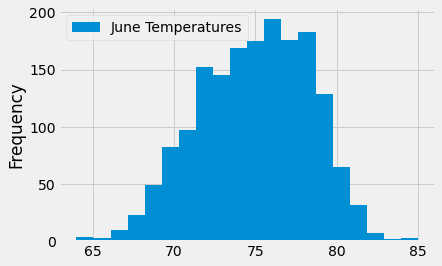

In [33]:
june_df.plot.hist(bins=20)
plt.savefig("June_Temperatures.png")

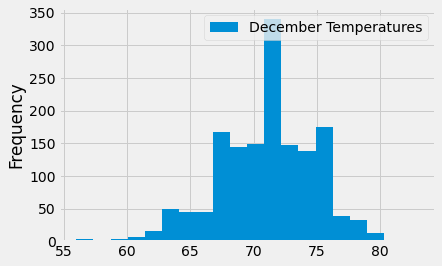

In [34]:
december_df.plot.hist(bins=20)
plt.savefig("December_Temperatures.png")

In [77]:
june_weather = session.query(Measurement.tobs, Measurement.prcp, Measurement.date).filter(Measurement.date.contains('-06-')).all()
june_weather

[(78.0, 0.0, '2010-06-01'),
 (76.0, 0.01, '2010-06-02'),
 (78.0, 0.0, '2010-06-03'),
 (76.0, 0.0, '2010-06-04'),
 (77.0, 0.0, '2010-06-05'),
 (78.0, 0.0, '2010-06-06'),
 (77.0, 0.0, '2010-06-07'),
 (78.0, 0.0, '2010-06-08'),
 (78.0, 0.0, '2010-06-09'),
 (79.0, 0.0, '2010-06-10'),
 (78.0, 0.0, '2010-06-11'),
 (78.0, 0.0, '2010-06-12'),
 (78.0, 0.0, '2010-06-13'),
 (77.0, 0.0, '2010-06-14'),
 (78.0, 0.0, '2010-06-15'),
 (78.0, 0.0, '2010-06-16'),
 (77.0, 0.0, '2010-06-17'),
 (77.0, 0.0, '2010-06-18'),
 (82.0, 0.0, '2010-06-19'),
 (78.0, 0.0, '2010-06-20'),
 (78.0, 0.0, '2010-06-21'),
 (78.0, 0.0, '2010-06-22'),
 (78.0, 0.0, '2010-06-23'),
 (78.0, 0.0, '2010-06-24'),
 (77.0, 0.0, '2010-06-25'),
 (76.0, 0.02, '2010-06-26'),
 (78.0, 0.0, '2010-06-27'),
 (78.0, 0.0, '2010-06-28'),
 (78.0, 0.0, '2010-06-29'),
 (78.0, 0.0, '2010-06-30'),
 (77.0, 0.07, '2011-06-01'),
 (78.0, 0.0, '2011-06-02'),
 (73.0, 0.56, '2011-06-03'),
 (70.0, 0.89, '2011-06-04'),
 (76.0, 0.0, '2011-06-05'),
 (77.0, 0.0, '2

In [134]:
june_weather_df = pd.DataFrame(june_weather)
june_weather_df.head()

,0,1,2
0,78.0,0.00,2010-06-01
1,76.0,0.01,2010-06-02
2,78.0,0.00,2010-06-03
3,76.0,0.00,2010-06-04
4,77.0,0.00,2010-06-05


In [158]:
dec_weather = session.query(Measurement.tobs, Measurement.prcp, Measurement.date).filter(Measurement.date.contains('-12-')).all()
dec_weather

[(76.0, 0.04, '2010-12-01'),
 (74.0, 0.0, '2010-12-03'),
 (74.0, 0.0, '2010-12-04'),
 (64.0, 0.0, '2010-12-06'),
 (64.0, 0.0, '2010-12-07'),
 (67.0, 0.0, '2010-12-08'),
 (77.0, 0.0, '2010-12-09'),
 (66.0, 1.58, '2010-12-10'),
 (69.0, 0.77, '2010-12-11'),
 (68.0, 0.0, '2010-12-12'),
 (68.0, 0.0, '2010-12-13'),
 (71.0, 0.0, '2010-12-14'),
 (74.0, 0.0, '2010-12-15'),
 (67.0, 0.0, '2010-12-16'),
 (66.0, 0.0, '2010-12-17'),
 (69.0, 0.0, '2010-12-18'),
 (71.0, 1.4, '2010-12-19'),
 (70.0, 0.0, '2010-12-23'),
 (70.0, 0.0, '2010-12-24'),
 (74.0, None, '2010-12-26'),
 (74.0, 0.13, '2010-12-27'),
 (71.0, 0.55, '2010-12-28'),
 (75.0, 0.06, '2010-12-29'),
 (75.0, 0.01, '2010-12-30'),
 (72.0, 0.0, '2010-12-31'),
 (69.0, 0.03, '2011-12-01'),
 (68.0, 0.08, '2011-12-02'),
 (73.0, 0.0, '2011-12-03'),
 (74.0, 0.0, '2011-12-04'),
 (73.0, 0.0, '2011-12-05'),
 (73.0, 0.0, '2011-12-06'),
 (73.0, 0.0, '2011-12-07'),
 (73.0, 0.0, '2011-12-08'),
 (71.0, 0.13, '2011-12-09'),
 (73.0, 0.07, '2011-12-10'),
 (73.0, 

In [159]:
dec_weather_df = pd.DataFrame(dec_weather)
dec_weather_df.head()

,0,1,2
0,76.0,0.04,2010-12-01
1,74.0,0.00,2010-12-03
2,74.0,0.00,2010-12-04
3,64.0,0.00,2010-12-06
4,64.0,0.00,2010-12-07
